# Import Data
Here we have 2 dataset of College Test Scores of 2 years: 2020, 2021

In [1]:
import pandas as pd


Province = pd.read_excel('data/Province.xlsx.ocr.xlsx')
DiemThi2022 = pd.read_csv('data/diem_thi_thpt_2022.csv')
#DiemThi2020 = pd.read_csv("diem_thi_2022-main/diemthi2020.csv")

DiemThi2021 = pd.read_excel("data/2021/1.xlsx")

for x in range(2,66):
    dt = pd.read_excel(f"data/2021/{x}.xlsx")
    DiemThi2021 = pd.concat([DiemThi2021,dt],ignore_index=True)

DiemThi2022

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.00,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.50,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.50,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.50,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.50,8.25
...,...,...,...,...,...,...,...,...,...,...
995436,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
995437,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
995438,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
995439,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


## Exploring Data

In [8]:
DiemThi2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936478 entries, 0 to 936477
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SBD        936478 non-null  object 
 1   Tên        86367 non-null   object 
 2   Ngày Sinh  86359 non-null   object 
 3   Giới tính  86367 non-null   object 
 4   Toán       926884 non-null  float64
 5   Văn        924108 non-null  float64
 6   Lý         334299 non-null  float64
 7   Hoá        335857 non-null  float64
 8   Sinh       330729 non-null  float64
 9   KHTN       50231 non-null   float64
 10  Lịch Sử    594727 non-null  float64
 11  Địa Lý     589110 non-null  float64
 12  GDCD       497377 non-null  float64
 13  KHXH       28174 non-null   float64
 14  Ngoại Ngữ  823038 non-null  float64
 15  Nơi Thi    936478 non-null  object 
dtypes: float64(11), object(5)
memory usage: 114.3+ MB


In [9]:
DiemThi2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995441 entries, 0 to 995440
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        995441 non-null  int64  
 1   toan       982726 non-null  float64
 2   ngu_van    981407 non-null  float64
 3   ngoai_ngu  870609 non-null  float64
 4   vat_li     325523 non-null  float64
 5   hoa_hoc    327367 non-null  float64
 6   sinh_hoc   322198 non-null  float64
 7   lich_su    659662 non-null  float64
 8   dia_li     657421 non-null  float64
 9   gdcd       554343 non-null  float64
 10  Province   995441 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 83.5+ MB


In [99]:
print(DiemThi2022['Toán'].describe())
print(DiemThi2021['Toán'].describe())

count    982726.000000
mean          6.466254
std           1.675435
min           0.000000
25%           5.400000
50%           6.800000
75%           7.800000
max          10.000000
Name: Toán, dtype: float64
count    926884.000000
mean          6.643514
std           1.663668
min           0.000000
25%           5.600000
50%           7.000000
75%           8.000000
max          10.000000
Name: Toán, dtype: float64


## Preprocessing Data


In [3]:
r = []

for x in DiemThi2022['sbd']:
    if len(str(x)) < 8:
        province = Province.iloc[int(str(x)[:1])-1][1]
        r.append(province)
    else:
        province = Province.iloc[int(str(x)[:2])-1][1]
        r.append(province)
DiemThi2022['Nơi Thi'] = r

y = []

for x in DiemThi2021['SBD']:
    if len(str(x)) < 8:
        province = Province.iloc[int(str(x)[:1])-1][1]
        y.append(province)
    else:
        province = Province.iloc[int(str(x)[:2])-1][1]
        y.append(province)

DiemThi2021['Nơi Thi'] = y


In [100]:
DiemThi2022[DiemThi2022['Toán'] >= 9.8].groupby('Nơi Thi').count().reset_index().sort_values(by='Toán')[['Nơi Thi','Toán']]

#print(DiemThi2022[(DiemThi2022['Toán']+DiemThi2022['vat_li']+DiemThi2022['hoa_hoc']) >= 29.0])
DiemThi2021[(DiemThi2021['Toán']+DiemThi2021['Văn']+DiemThi2021['Ngoại Ngữ']) >= 29.0]

,SBD,Tên,Ngày Sinh,Giới tính,Toán,Văn,Lý,Hoá,Sinh,KHTN,Lịch Sử,Địa Lý,GDCD,KHXH,Ngoại Ngữ,Nơi Thi
21837,1021881,NaN,NaN,NaN,9.6,9.50,NaN,NaN,NaN,NaN,6.00,8.50,9.25,NaN,10.0,Hà Nội
63301,1063548,NaN,NaN,NaN,9.6,9.50,NaN,NaN,NaN,NaN,5.25,6.25,9.50,NaN,10.0,Hà Nội
581516,36000400,NaN,NaN,NaN,9.4,9.75,NaN,NaN,NaN,NaN,6.50,8.75,9.50,NaN,10.0,Kon Tum


In [98]:
column2022 = {
    'sbd': 'SBD',
    'Toán':'Toán',
    'ngu_van':'Văn',
    'Ngoại Ngữ': 'Ngoại Ngữ',
    'vat_li': 'Lý',
    'hoa_hoc': 'Hóa',
    'sinh_hoc': 'Sinh',
    'lich_su': 'Lịch Sử',
    'dia_li': 'Địa Lý',
    'gdcd': 'GDCD',	
    'Nơi Thi': 'Nơi Thi'}
DiemThi2022 = DiemThi2022.rename(columns=column2022)
DiemThi2022

,SBD,Toán,Văn,Ngoại Ngữ,Lý,Hóa,Sinh,Lịch Sử,Địa Lý,GDCD,Nơi Thi
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.00,8.75,Hà Nội
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.50,8.25,Hà Nội
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.50,8.75,Hà Nội
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.50,7.50,Hà Nội
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.50,8.25,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...
995436,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00,Hậu Giang
995437,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50,Hậu Giang
995438,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00,Hậu Giang
995439,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75,Hậu Giang


In [101]:
DiemThi2022.iloc[:,[1,4,5]]
DiemThi2022

,SBD,Toán,Văn,Ngoại Ngữ,Lý,Hóa,Sinh,Lịch Sử,Địa Lý,GDCD,Nơi Thi
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.00,8.75,Hà Nội
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.50,8.25,Hà Nội
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.50,8.75,Hà Nội
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.50,7.50,Hà Nội
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.50,8.25,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...
995436,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00,Hậu Giang
995437,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50,Hậu Giang
995438,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00,Hậu Giang
995439,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75,Hậu Giang


## Top 10 Provinces with Highest Average of All Subjects 2021-2022

In [102]:
DiemThi2022.assign(avg=DiemThi2022.iloc[:,1:10].mean(axis=1)).groupby('Nơi Thi').mean().sort_values(by='avg',ascending=False).reset_index()[['Nơi Thi', 'avg']].head(10)

,Nơi Thi,avg
0,Vĩnh Phúc,6.954082
1,Nam Định,6.948303
2,Ninh Bình,6.938236
3,Bình Dương,6.937562
4,Hải Phòng,6.908472
5,Hà Nam,6.728610
6,Bắc Ninh,6.710866
7,Phú Thọ,6.689901
8,Hả Tĩnh,6.687446
9,Bạc Liêu,6.558116


In [104]:
DiemThi2021.assign(avg=DiemThi2021.iloc[:,[4,5,6,7,8,10,11,12,14]].mean(axis=1)).groupby('Nơi Thi').mean().sort_values(by='avg',ascending=False).reset_index()[['Nơi Thi', 'avg']].head(10)

,Nơi Thi,avg
0,Bình Dương,6.938731
1,Nam Định,6.908423
2,An Giang,6.843954
3,Ninh Bình,6.796317
4,Hà Nam,6.753711
5,Vĩnh Phúc,6.702179
6,Bạc Liêu,6.674401
7,TP.Hồ Chí Minh,6.661644
8,Lâm Đồng,6.631028
9,Hải Phòng,6.603501


## Percent Sudent 

In [105]:
z = DiemThi2022[DiemThi2022['Toán'] <= 5.0].count()['Toán']
percent_below_5 = z * 100 / len(DiemThi2022)
print(f'Students below average: {percent_below_5}')

z = DiemThi2022[DiemThi2022['Toán'] <= 1.0].count()['Toán']
percent_below_1 = z * 100 / len(DiemThi2022)
print(f'Students below paralysis point: {percent_below_1}\n')


z = DiemThi2022[DiemThi2022['Toán'] <= 5.0].groupby('Nơi Thi').count().reset_index()[['Nơi Thi','Toán']]
d = DiemThi2022.groupby('Nơi Thi').count().reset_index()[['Nơi Thi','Toán']]

v = []
for x in range(0,63):
    v.append(z.loc[x][1] * 100 / d.loc[x][1] )

z['Percent_Below_AVG'] = v 
print(z.sort_values(by='Percent_Below_AVG', ascending=True).reset_index(drop=True).head(22))

Students below average: 21.089346329918097
Students below paralysis point: 0.016475110026611322

            Nơi Thi   Toán  Percent_Below_AVG
0        Bình Dương    764           6.022862
1          Nam Định   1222           6.213454
2    TP.Hồ Chí Minh   6526           7.760363
3        Tiền Giang   1671          11.235124
4         Ninh Bình   1190          11.470985
5            Hà Nam   1070          11.819286
6         Thái Bình   2507          12.533747
7           Long An   1982          13.086827
8          Bạc Liêu    837          13.480432
9         Hải Phòng   3183          14.269064
10  Bà Rịa-Vũng Tàu   1808          14.378877
11        Vĩnh Phúc   1983          14.449140
12         Bắc Ninh   2328          14.773448
13          Đà Nẵng   1969          15.836886
14        Vĩnh Long   1631          15.955782
15         Lâm Đồng   2231          15.966507
16         An Giang   2952          16.107383
17          Bến Tre   2042          16.758309
18        Binh Định   3084   

## Math Score Spectrum in 2022

There were 981,407 candidates taking the exam, with an average score of 6.5

While 7.8 is the Grades that has the most candidates with 54,495 students and 35 students with 10, 6 students in Hà Nội and 6 students in TP.Hồ Chí Minh, showing that the quality of students taking the math exam in the two big cities is better than other provinces

There are 21.09% of candidates below the average score and 0.01% of the students below 1.0



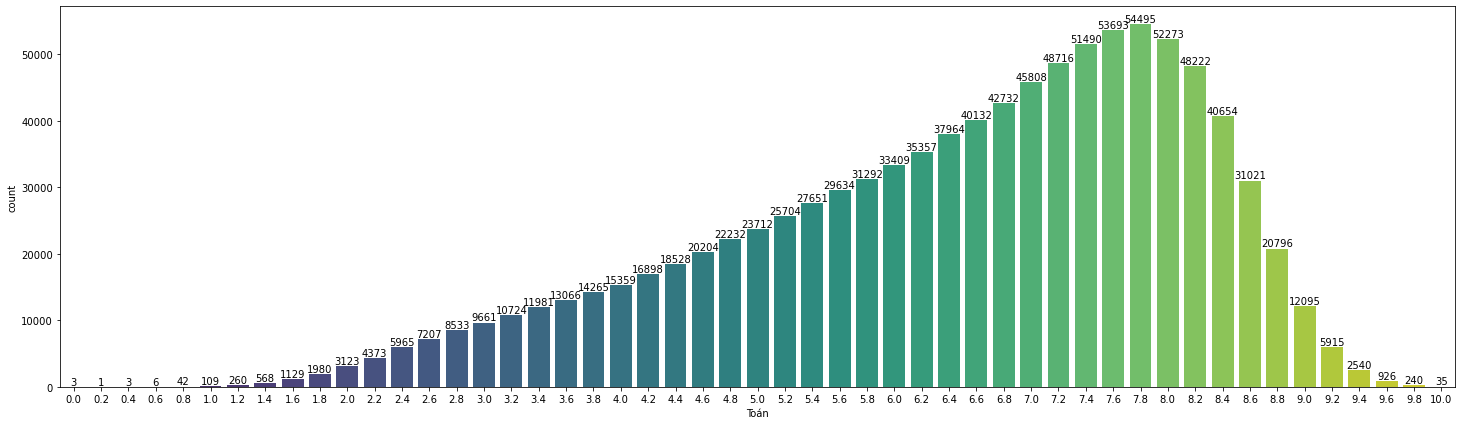

In [106]:

#HCM = DiemThi2022[DiemThi2022['Nơi Thi'] == "TP.Hồ Chí Minh"]

a = DiemThi2022['Toán'].value_counts().sort_index().values
ax = plt.figure(figsize=(25,7))
ax = sns.countplot(x="Toán", data=DiemThi2022, palette="viridis")
ax.bar_label(container=ax.containers[0], labels=a)
plt.show()


# b = DiemThi2021['Toán'].value_counts().sort_index().values
# ax = plt.figure(figsize=(25,7))
# ax = sns.countplot(x="Toán", data=DiemThi2021, palette="viridis")
# ax.bar_label(container=ax.containers[0], labels=b)
# plt.show()

## Math Scores 2021-2022


This year's math exam has a better distribution between difficult and easy questions than last year

The proof is that the peak of the score spectrum is still ranging from 7 to 8, but the number of candidates over 8 has decreased significantly and the number of candidates under 7 has also increased.

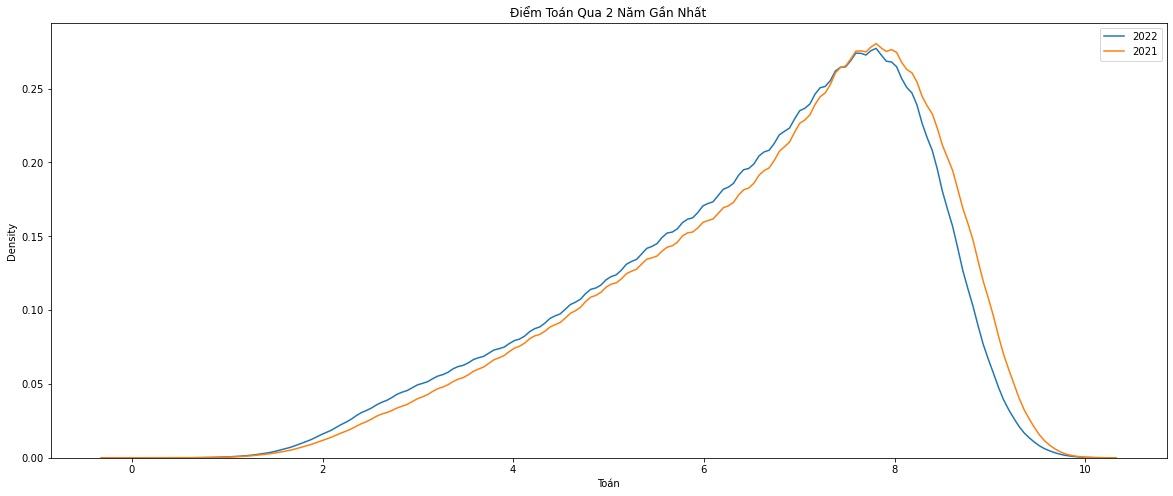

In [107]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
ax = sns.kdeplot(DiemThi2022['Toán'], label='2022')
ax = sns.kdeplot(DiemThi2021['Toán'], label='2021')

plt.xlabel('Toán')
plt.title('Điểm Toán Qua 2 Năm Gần Nhất')
ax.legend()
plt.show()

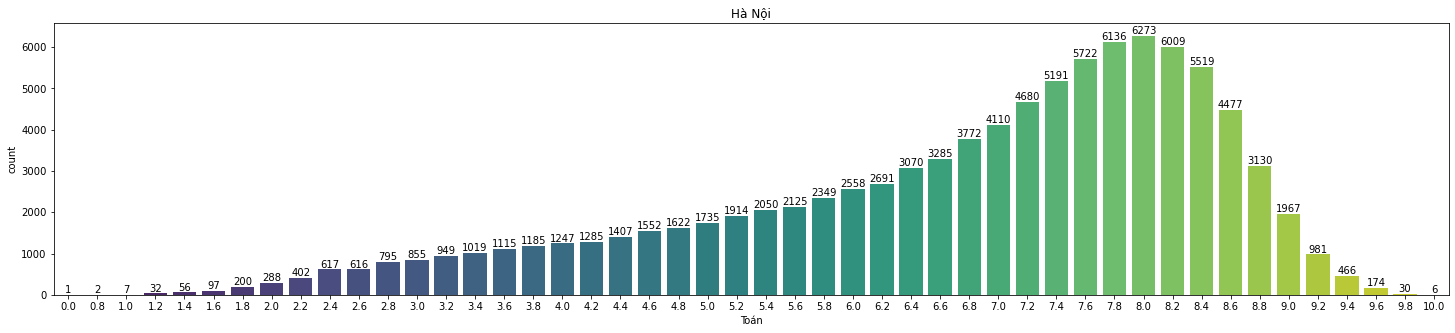

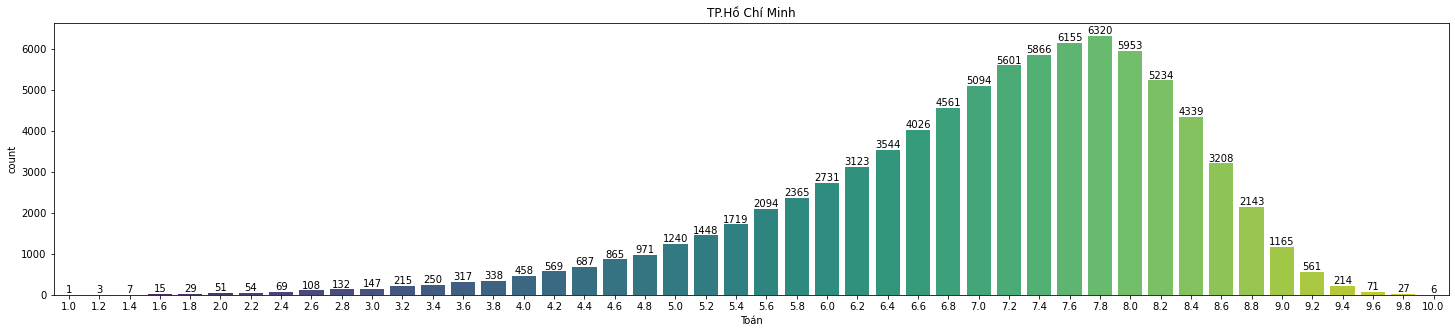

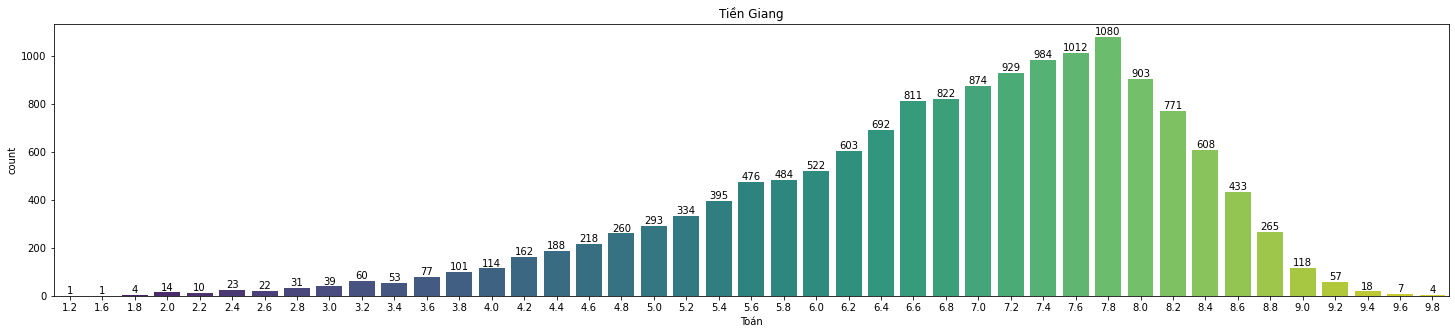

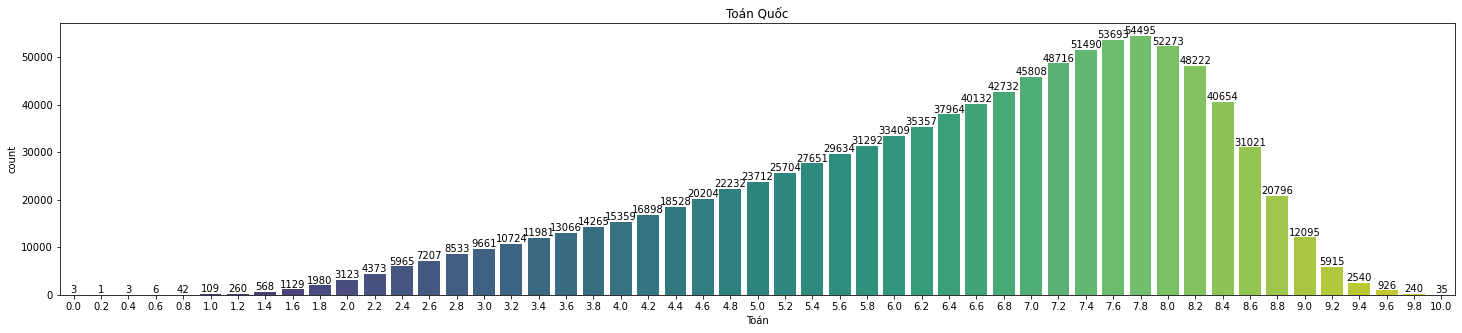

In [108]:
HN = DiemThi2022[DiemThi2022['Nơi Thi'] == "Hà Nội"]

a = HN.value_counts().sort_index().values
ax = plt.figure(figsize=(25,5))
ax = sns.countplot(x="Toán", data=HN, palette="viridis")
ax.bar_label(container=ax.containers[0], labels=a)
plt.title('Hà Nội')
plt.show()

HN = DiemThi2022[DiemThi2022['Nơi Thi'] == "TP.Hồ Chí Minh"]

a = HN.value_counts().sort_index().values
ax = plt.figure(figsize=(25,5))
ax = sns.countplot(x="Toán", data=HN, palette="viridis")
ax.bar_label(container=ax.containers[0], labels=a)
plt.title('TP.Hồ Chí Minh')
plt.show()

HN = DiemThi2022[DiemThi2022['Nơi Thi'] == "Tiền Giang"]

a = HN.value_counts().sort_index().values
ax = plt.figure(figsize=(25,5))
ax = sns.countplot(x="Toán", data=HN, palette="viridis")
ax.bar_label(container=ax.containers[0], labels=a)
plt.title('Tiền Giang')
plt.show()

a = DiemThi2022['Toán'].value_counts().sort_index().values
ax = plt.figure(figsize=(25,5))
ax = sns.countplot(x="Toán", data=DiemThi2022, palette="viridis")
ax.bar_label(container=ax.containers[0], labels=a)
plt.title('Toán Quốc')
plt.show()

## Top 10 Provinces with the Highest Math Scores 2021-2022


Nam Định has the highest average math score this year, the learning quality of Nam Định's students was very good and uniform across each district, proof that Nam Định has been at the top for 2 years

Even though there were 6 contestants with 10 grades, but not even in the top 10

Hà Nội is not present in this top 10 because the number of candidates below the average of Hanoi is for about 17.8%, much more than 11.8% of Tiền Giang.

It can be seen that the learning quality of Hanoi students is uneven across regions and schools.

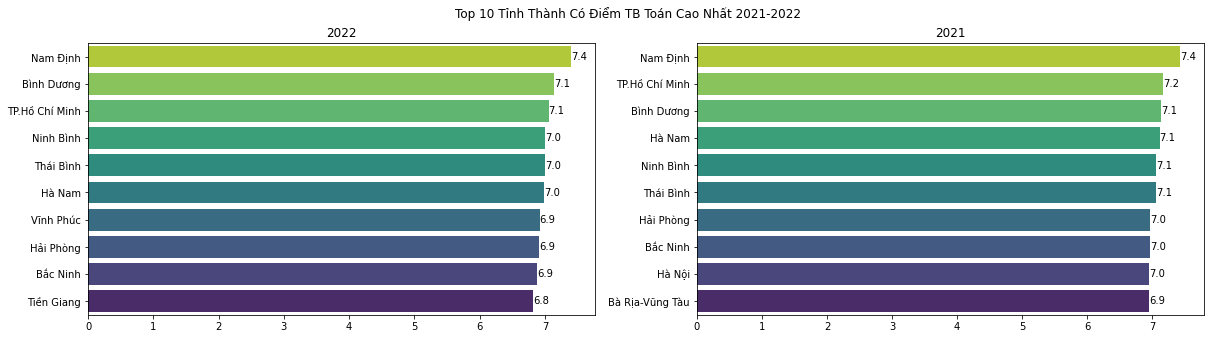

In [109]:
AVG = DiemThi2022[['Toán', 'Nơi Thi']].groupby('Nơi Thi').mean().reset_index().sort_values(by='Toán',ascending=False)[:10]
AVG1 = DiemThi2021[['Toán', 'Nơi Thi']].groupby('Nơi Thi').mean().reset_index().sort_values(by='Toán',ascending=False)[:10]

fig,axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.barplot(x='Toán',y='Nơi Thi', data=AVG, ci=None, palette='viridis_r', ax=axes[0])
ax.bar_label(container=ax.containers[0], labels=round(AVG['Toán'],1))
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set_title('2022')

ax = sns.barplot(x='Toán',y='Nơi Thi', data=AVG1, ci=None, palette='viridis_r', ax=axes[1])
ax.bar_label(container=ax.containers[0], labels=round(AVG1['Toán'],1))
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set_title('2021')
plt.suptitle('Top 10 Tỉnh Thành Có Điểm TB Toán Cao Nhất 2021-2022')
plt.show()

## English Score Spectrum in 2022 

The English score spectrum declined from 4 grades, comparing to the previous year which have 2 peaks of 4 grades and 9 grades

The English Exam this year has been improved better than 2021

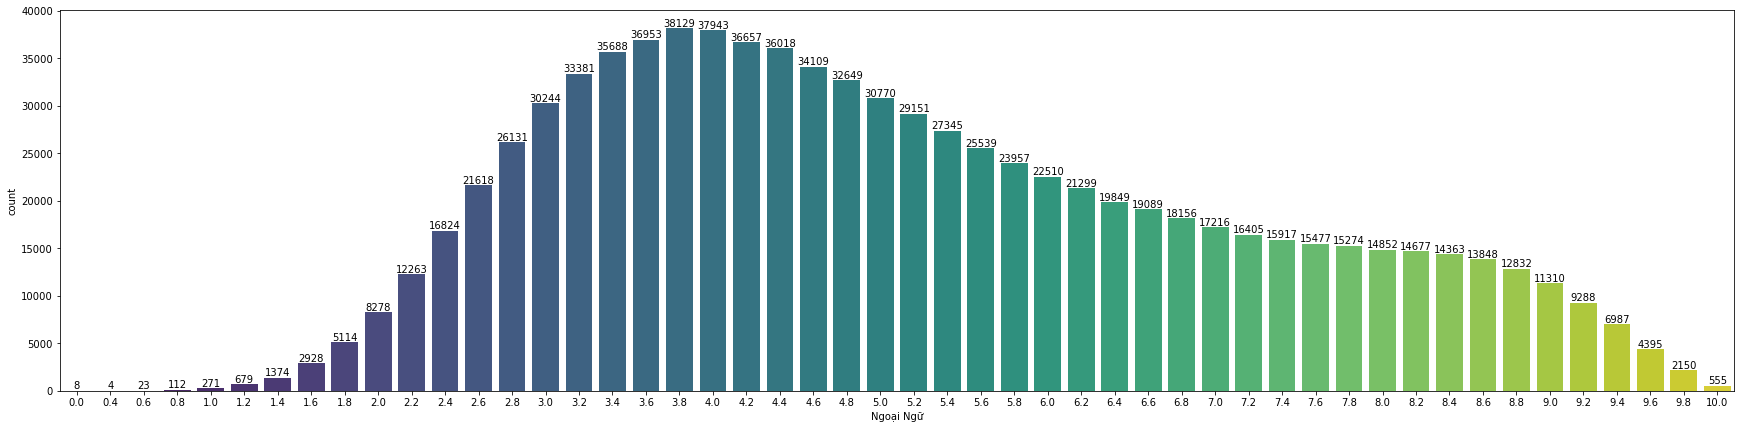

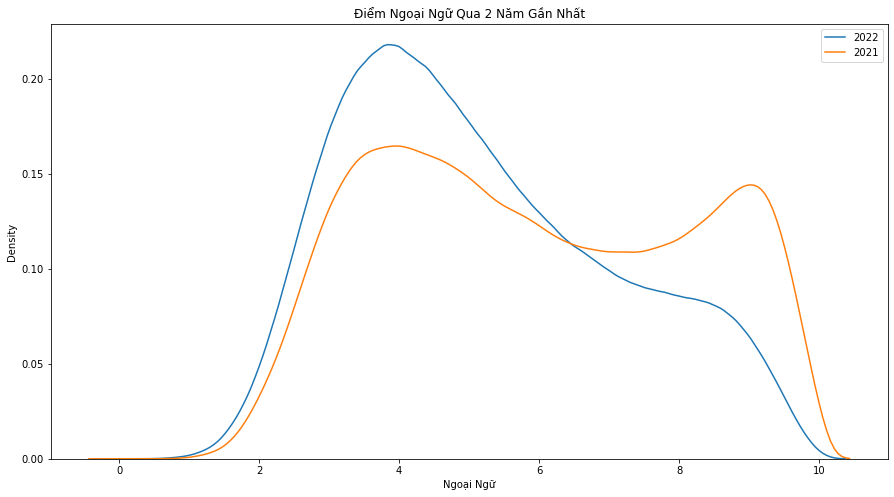

In [110]:
a = DiemThi2022['Ngoại Ngữ'].value_counts().sort_index().values
ax = plt.figure(figsize=(30,7))
ax = sns.countplot(x="Ngoại Ngữ", data=DiemThi2022, palette="viridis")
ax.bar_label(container=ax.containers[0], labels=a)
plt.show()


# b = DiemThi2021['Ngoại Ngữ'].value_counts().sort_index().values
# ax = plt.figure(figsize=(30,7))
# ax = sns.countplot(x="Ngoại Ngữ", data=DiemThi2021, palette="viridis")
# ax.bar_label(container=ax.containers[0], labels=b)
# plt.show()


plt.figure(figsize=(15,8))
ax = sns.kdeplot(DiemThi2022['Ngoại Ngữ'], label='2022')
ax = sns.kdeplot(DiemThi2021['Ngoại Ngữ'], label='2021')
#ax = sns.kdeplot(DiemThi2020['Van'], label='2020')

plt.xlabel('Ngoại Ngữ')
plt.title('Điểm Ngoại Ngữ Qua 2 Năm Gần Nhất')
ax.legend()
plt.show()

## Top 10 Provinces with the Highest English Scores 2021-2022

The top 3 has still unchanged from 2021, the top 10 witnessed one change from appearance of Bac Ninh.

Ho Chi Minh City and Binh Duong have still led the first two positions within two years, demonstrating that the quality of English education in these two provinces is far superior to other regions due to an early investment in foreign languages.

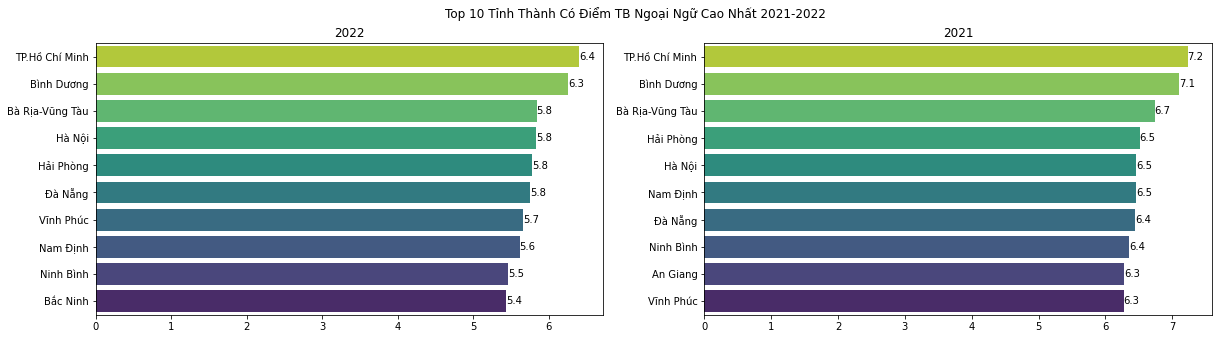

In [111]:
AVG = DiemThi2022[['Ngoại Ngữ', 'Nơi Thi']].groupby('Nơi Thi').mean().reset_index().sort_values(by='Ngoại Ngữ',ascending=False)[:10]
AVG1 = DiemThi2021[['Ngoại Ngữ', 'Nơi Thi']].groupby('Nơi Thi').mean().reset_index().sort_values(by='Ngoại Ngữ',ascending=False)[:10]

fig,axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
ax = sns.barplot(x='Ngoại Ngữ',y='Nơi Thi', data=AVG, ci=None, palette='viridis_r', ax=axes[0])
ax.bar_label(container=ax.containers[0], labels=round(AVG['Ngoại Ngữ'],1))
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set_title('2022')

ax = sns.barplot(x='Ngoại Ngữ',y='Nơi Thi', data=AVG1, ci=None, palette='viridis_r', ax=axes[1])
ax.bar_label(container=ax.containers[0], labels=round(AVG1['Ngoại Ngữ'],1))
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set_title('2021')
plt.suptitle('Top 10 Tỉnh Thành Có Điểm TB Ngoại Ngữ Cao Nhất 2021-2022')
plt.show()

In [113]:

DiemThiHCM2021 = DiemThi2021[DiemThi2021['Tên'].notnull()].sort_values(by='SBD')
DiemThiHCM2021

,SBD,Tên,Ngày Sinh,Giới tính,Toán,Văn,Lý,Hoá,Sinh,KHTN,Lịch Sử,Địa Lý,GDCD,KHXH,Ngoại Ngữ,Nơi Thi
100847,2000001,Đỗ Thị Thúy An,22-09-2003,Nữ,8.2,7.00,8.00,8.50,7.75,8.08,NaN,NaN,NaN,NaN,8.2,TP.Hồ Chí Minh
100900,2000002,Hoàng Phương An,2003-09-10 00:00:00,Nữ,8.8,7.00,NaN,NaN,NaN,NaN,7.75,8.00,9.00,8.25,9.8,TP.Hồ Chí Minh
100934,2000003,Lê Minh Châu An,2002-04-09 00:00:00,Nữ,7.8,6.50,NaN,NaN,NaN,NaN,7.75,7.25,9.25,8.08,9.2,TP.Hồ Chí Minh
100864,2000004,Nguyễn Ngọc Thy An,14-10-2003,Nữ,6.6,7.00,NaN,NaN,NaN,NaN,6.00,7.50,9.25,7.58,9.6,TP.Hồ Chí Minh
100998,2000005,Nguyễn Như Minh An,16-06-2003,Nữ,8.0,6.75,5.75,8.00,7.25,7.00,NaN,NaN,NaN,NaN,8.6,TP.Hồ Chí Minh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187166,2089271,Nguyễn Thị Hồng Yến,16-01-2002,Nữ,6.2,5.25,6.25,6.50,6.75,6.50,NaN,NaN,NaN,NaN,NaN,TP.Hồ Chí Minh
187160,2089272,Nguyễn Thị Phi Yến,16-02-2003,Nữ,4.6,3.75,NaN,NaN,NaN,NaN,6.50,6.75,NaN,NaN,NaN,TP.Hồ Chí Minh
187193,2089273,Phún Gia Yến,26-05-2003,Nữ,7.8,6.75,NaN,NaN,NaN,NaN,7.25,8.00,9.00,8.08,9.6,TP.Hồ Chí Minh
187196,2089274,Trần Thị Ngọc Yến,1998-08-02 00:00:00,Nữ,6.4,5.25,4.50,7.75,4.50,5.58,NaN,NaN,NaN,NaN,NaN,TP.Hồ Chí Minh
